In [1]:
import torchvision.models as models
from flashtorch.utils import load_image ,apply_transforms
from flashtorch.saliency import Backprop
import matplotlib as plt 
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
import pandas as pd
import sys
import cv2
import matplotlib.pyplot as plt
import torchvision.models as models
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop
from PIL import Image

In [2]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print('Device used:', device)

Device used: cpu


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, padding=2),
            nn.Dropout2d(0.4),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2),     
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.Dropout2d(0.3),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),            
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3,padding=1),
            nn.Dropout2d(0.3),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3,padding=1),
            nn.Dropout2d(0.3),
            nn.LeakyReLU(negative_slope=0.05),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            
        )
        self.fc = nn.Sequential(
            nn.Linear(3*3*128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, 7)
        )

    def forward(self, x):
        #image size (48,48)
        #print("init",x.shape)
        x = self.conv1(x) #(24,24)
        #print("1:",x.shape)
        x = self.conv2(x) #(12,12)
        #print("2:",x.shape)
        x = self.conv3(x) #(6,6)
        #print("3:",x.shape)
        x = self.conv4(x) #(3,3)
        #print("4:",x.shape)
        x = x.view(-1, 3*3*128)
        x = self.fc(x)
        return x

In [4]:
class ImageNet(nn.Module):
    def __init__(self):
        super(ImageNet,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 48, kernel_size=3,stride =(1,1)),
            nn.Dropout2d(0.3),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(48, 128, kernel_size=3,stride =(1,1)),
            nn.Dropout2d(0.2),
            nn.MaxPool2d(2),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3,stride =(1,1)),
            nn.Dropout2d(0.5),
            nn.MaxPool2d(2),
            nn.ReLU()
        )

        self.fcn1 = nn.Linear(in_features =4096 ,out_features =512 ,bias = True)
        self.fcn2 = nn.Linear(in_features = 512,out_features =256 ,bias = True)
        self.fcn3 = nn.Linear(in_features =256 ,out_features =7 ,bias = True)

    def forward(self , x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0),-1)
        #print("size:",x.shape)
        x = F.relu(self.fcn1(x))
        x = F.relu(self.fcn2(x))
        out = self.fcn3(x)
        

In [5]:
train_image=[]
for i in range(30):
    image = load_image('./train_img/000{:02d}.jpg'.format(i))
    input_ = apply_transforms(image,size = 48)
    train_image.append(input_)


In [9]:
model = Net()
model.load_state_dict(torch.load('./model_601.pth',map_location ='cpu'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [ ]:
backprop = Backprop(model)

In [ ]:
target_class = 0
for i in range(30):
    backprop.visualize(train_image[i] , target_class, guided = True)


conv1 output finish


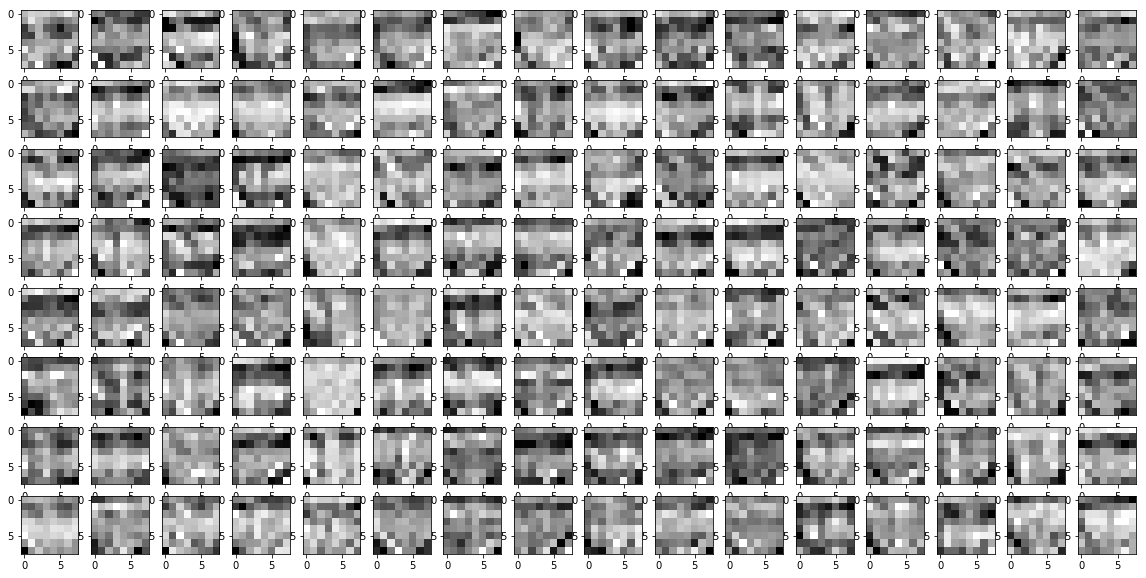

In [25]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output
    return hook
image =  cv2.imread('./train_img/00001.jpg',cv2.IMREAD_GRAYSCALE)
var_image = torch.autograd.Variable(torch.Tensor(image))

model = torch.load('./Imagenet_best.pkl',map_location ='cpu')
model.conv3[0].register_forward_hook(get_activation('conv3'))
model.eval()
#pdb.set_trace()
output = model(var_image.view(-1,1,48,48))
#pdb.set_trace()
act = activation['conv3'].detach().squeeze().cpu()
#pdb.set_trace()
plt.figure(figsize=(20,10))
for i in range(8):
    for j in range(16):
        #print(i,j)
        plt.subplot(8,16,i*16+j+1)
        plt.imshow(act[i*16+j], cmap = plt.cm.gray)
plt.savefig('feature_map.jpg')
print('conv1 output finish')

In [10]:
from flashtorch.activmax import gradient_ascent
g_ascent = gradient_ascent.GradientAscent(model.conv1,img_size=3)

In [11]:
conv5_1 = model.conv1[0]
conv5_1_filters = [2,3,]

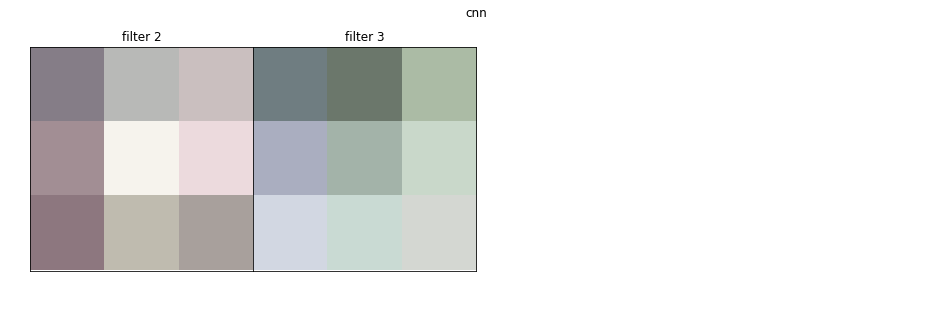

In [12]:
g_ascent.visualize(conv5_1  ,conv5_1_filters,figsize = (128 ,128 ,3, 3),title ='cnn')

In [13]:

import torch as t
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
import numpy as np
from torchvision.transforms import ToTensor, ToPILImage
from PIL import Image



toTensor = ToTensor()
toImg = ToPILImage()


def mean_activation(featureMap):
    return featureMap.mean()

def get_feature_activation(model, ten):
    out = model(ten)
    featureAct = []
    for i in range(30):
        featureAct.append(mean_activation(out[0,i]).to('cpu').detach().numpy())
    return featureAct

def get_visual_feature(model, targetFeature, device, epoch):
    ary = np.ones((1,3,48,48),dtype= np.float32) * 0.5
    feature = t.tensor(ary, requires_grad=True)
    optimizer = optim.Adam([feature],lr=10e-4)
    loss = 0
    for i in range(epoch):
        img = feature.to(device)
        optimizer.zero_grad()
        predict = model(img)
        loss = -mean_activation(predict[0,targetFeature])
        loss.backward()
        optimizer.step()
    print(loss.item())
    return (feature.to('cpu').squeeze(0)*255).int().numpy().astype(np.uint8)



def main():
    device = 'cpu' if not t.cuda.is_available() else 'cuda:0'
    modelName = 'ResSimple'
    testImg = './train_img/00100.jpg'
    modelPath = './model_601.pth'
    epoch = 200
    transforms = T.Compose([
                T.ToTensor(),
                T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                ])
    

    model = Net()
    model.load_state_dict(t.load(modelPath,map_location='cpu'))
    model = nn.Sequential(*list(model.children())[0], *list(model.children())[5:-1]) 
    model = model.to(device)
    model.eval()

    img = Image.open(testImg)
    img = img.convert('RGB')
    ten = transforms(img)
    ten = ten.unsqueeze(0).to(device)
    #########################################################################
    featureAct = get_feature_activation(model, ten)
    
    maxIndex = np.argsort(featureAct)[-20:]
    features = []
    for i in reversed(maxIndex):
        features.append(get_visual_feature(model, i, device, epoch).reshape(1,3,48,48))
    features = np.concatenate(features, axis = 0)
    print(features)
main()

-0.5076330900192261
-3.0147035121917725
-1.294969081878662
-0.5069136619567871
-1.7070331573486328
-1.1207870244979858
-0.90706467628479
-1.7009738683700562
-1.8350813388824463
-1.7087702751159668
-2.291754961013794
-1.606735110282898
-1.3044062852859497
-2.33909010887146
-0.8361115455627441
-0.28767839074134827
-2.390988349914551
-2.459092378616333
-1.7857115268707275
-1.97856605052948
[[[[ 76  76 178 ... 103  80 196]
   [ 76  78  77 ...  53  58  58]
   [ 71  70  73 ... 123  59  57]
   ...
   [ 62 162  60 ...  76  76  76]
   [196 196  63 ... 178 178 178]
   [ 57  58  56 ...  76  76  76]]

  [[ 77  76 177 ... 163 118 196]
   [ 76 177 173 ...  52  56  58]
   [ 68  68  75 ...  67  56  58]
   ...
   [ 63 150 149 ...  76  76  76]
   [201 120  92 ... 178 178 178]
   [ 58  59  54 ...  76  76  76]]

  [[ 76  76 178 ...  99 102 196]
   [ 76  77  78 ...  53  58  58]
   [ 85  69  76 ...  86  56  58]
   ...
   [ 81 148 153 ... 178  76  76]
   [198 131  62 ... 178 178 178]
   [ 57  58  59 ...  76 